In [2]:
import import_ipynb
from Model_Functions import *

# 8. Naive Baye's for Personalized Cancer Diagnosis

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

### 8.1 Training Naive Baye's model

The CalibratedClassifierCV we used here, grabs (yi)s and converts them to their probabilities. We need to do so because here we are using logloss and logloss requires probability values to operate.
<br>
Naive Baye's works well with high dimensions. So here we prefer using One hot encoding for Naive Baye's.

In [4]:
alpha = [10**-4, 10**-3, 10**-2, 10**-1, 10, 100, 1000, 10000]
logloss_cv = []
for i in alpha:
    print('For alpha =', i)
    algo = MultinomialNB(alpha=i)
    algo.fit(train_x_onehotCoding, y_train)
    sigmoid_clf = CalibratedClassifierCV(algo, method="sigmoid")
    sigmoid_clf.fit(train_x_onehotCoding, y_train)
    # To avoid rounding error while multiplying probabilites we use log-probability estimates
    sigmoid_clf_probs = sigmoid_clf.predict_proba(cv_x_onehotCoding)
    logloss_cv.append(log_loss(cv_y, sigmoid_clf_probs, labels=algo.classes_, eps=1e-15))
    
    print("Log Loss :",log_loss(cv_y, sigmoid_clf_probs))

For alpha = 0.0001
Log Loss : 1.2208932738349005
For alpha = 0.001
Log Loss : 1.211757059046007
For alpha = 0.01
Log Loss : 1.2131090730487413
For alpha = 0.1
Log Loss : 1.216326833480778
For alpha = 10
Log Loss : 1.3574411629084364
For alpha = 100
Log Loss : 1.3181314611241892
For alpha = 1000
Log Loss : 1.2699466143530769
For alpha = 10000
Log Loss : 1.2621614861530042


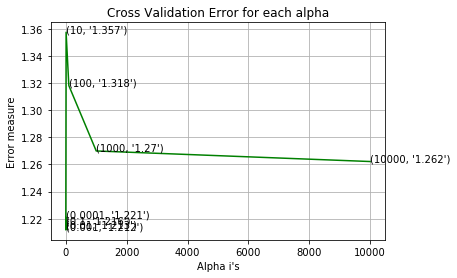

In [5]:
fig, ax = plt.subplots()
ax.plot(alpha, logloss_cv, c='g')
for i, txt in enumerate(np.round(logloss_cv, 3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i], logloss_cv[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [6]:
best_alpha = np.argmin(logloss_cv)
algo = MultinomialNB(alpha=alpha[best_alpha])
algo.fit(train_x_onehotCoding, y_train)
sigmoid_clf = CalibratedClassifierCV(algo, method="sigmoid")
sigmoid_clf.fit(train_x_onehotCoding, y_train)

CalibratedClassifierCV(base_estimator=MultinomialNB(alpha=0.001))

In [7]:
predict_y = sigmoid_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=algo.classes_, eps=1e-15))
predict_y = sigmoid_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=algo.classes_, eps=1e-15))
predict_y = sigmoid_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=algo.classes_, eps=1e-15))

For values of best alpha =  0.001 The train log loss is: 0.8397118597789881
For values of best alpha =  0.001 The cross validation log loss is: 1.211757059046007
For values of best alpha =  0.001 The test log loss is: 1.229225215293239


### 8.2 Testing Naive Baye's model

Log loss : 1.211757059046007
Mis-classified points : 36.65413533834587 %


------------------------------ Confusion matrix ------------------------------



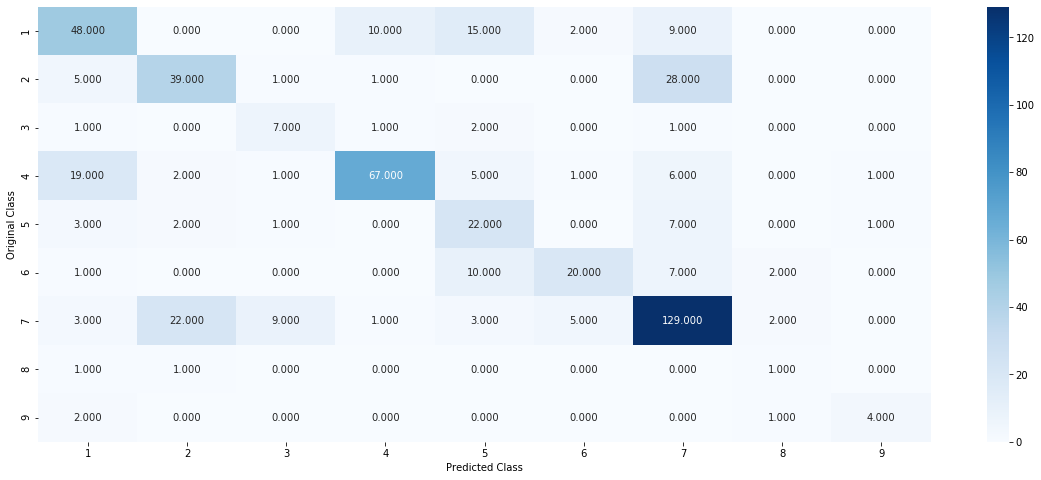



------------------------------ Precision matrix (Columm Sum=1) ------------------------------



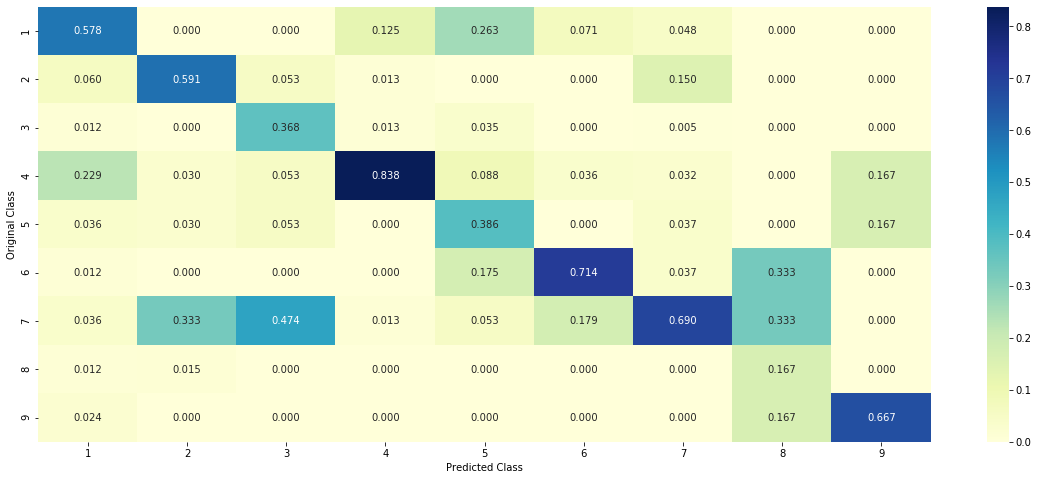



------------------------------ Recall matrix (Row sum=1) ------------------------------



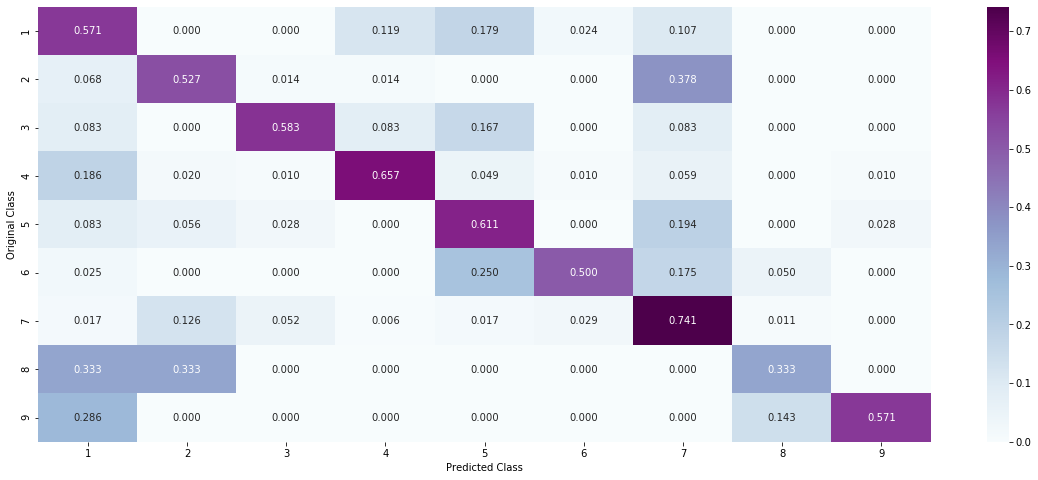

In [8]:
algo = MultinomialNB(alpha=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_onehotCoding, y_train, cv_x_onehotCoding, y_cv, algo)

### 8.3 Feature Importance: Correctly Classified Points

In [9]:
test_point_index = 1
no_feature = 100
predicted_cls = sigmoid_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmoid_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices=np.argsort(-1*abs(algo.coef_))[predicted_cls-1][:,:no_feature]
print("=="*30)
get_impfeature_names(indices[0], x_test['Text'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0903 0.0802 0.0113 0.1112 0.0379 0.0374 0.6229 0.0043 0.0046]]
Actual Class : 7
Out of the top  100  features  0 are present in query point


### 8.4 Feature Importance: Incorrectly Classified Points

In [10]:
test_point_index = 100
no_feature = 100
predicted_cls = sigmoid_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmoid_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-1*abs(algo.coef_))[predicted_cls-1][:,:no_feature]
print("=="*30)
get_impfeature_names(indices[0], x_test['Text'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.5683 0.0884 0.0123 0.1225 0.0418 0.0412 0.1157 0.0048 0.005 ]]
Actual Class : 1
Out of the top  100  features  0 are present in query point
